# **UbuntuServer**

## 已训练好的模型尝试分组

## 预训练时lr可以大一些，0.07效果不错
## 分组后lr需要小一些，0.007可以，但900轮后需要再衰减
## 衰减 0.993^400 = 0.06  大概1/20
## 预训练尽量lr大一些，找到开始震荡的点位，适当衰减。通过预训练找到分组时机

In [ ]:
# 0.07 0.4还可以 但是有点高 下次0.1 0.02


# 0.2 0.9995 在400轮之前可以 但是后面学习率偏大

# p_n20_lr0.07_d00.2_d10.999_pre400.pkl 很不错 依然很不错

In [2]:
import os
import shutil
import numpy as np
import pickle
import matplotlib.pyplot as plt

(122,)
(122,)


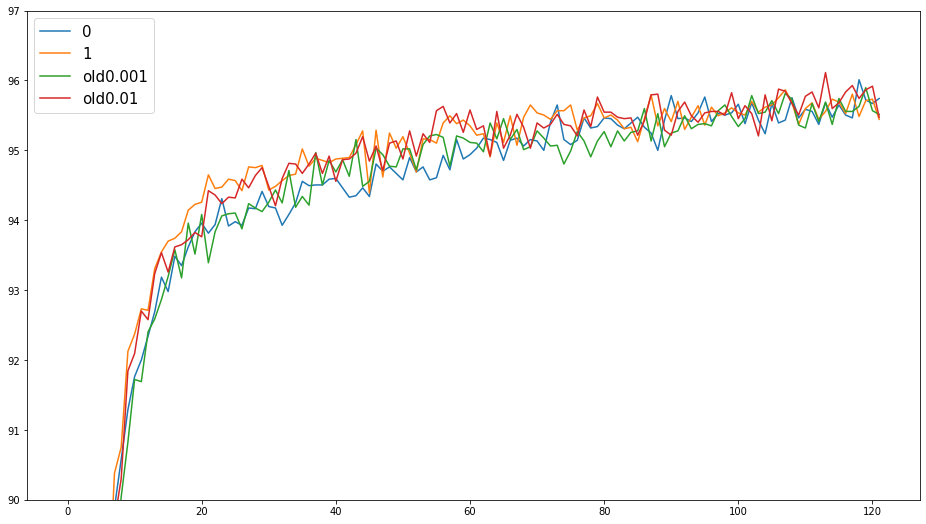

0:95.74226804123711 - P3_mu0.99_ld0.7_ln0.1_dN0.998_MNIST_nbal_0.001_MNIST_Net_lr0.2_d1.0_iter600_expC3.pkl - 122
1:95.44329896907216 - P3_mu0.99_ld0.7_ln0.1_dN0.998_MNIST_nbal_0.01_MNIST_Net_lr0.2_d1.0_iter600_expC3.pkl - 122


In [338]:
aol = "acc"
# aol = "loss"
file_path = f"./saved_exp_info/server_{aol}/"

g = []
    
for root, dirs, files in os.walk(file_path):

    # root 表示当前正在访问的文件夹路径
    # dirs 表示该文件夹下的子目录名list
    # files 表示该文件夹下的文件list
    
    # g_datasetCIFAR10  MNISTNet  Alex mixedTest FashionMNIST_shard IID_ clusterOnly CIFAR100
    
    # 遍历文件
    for file in files:
#         if 'P3' in file and '0.995' in file and '0.01' in file and 'MNIST' in file:
       if 'expC3' in file and '' in file:
            g.append(file)
            
# g = np.sort(np.array(g))

infs = []
infx = []

for index in range(len(g)):
    
    globe = g[index]
    
    inf_g = np.array(pickle.load(open(file_path + globe, 'rb')), dtype=object)
#     if len(inf_g)<=81:
    print(inf_g.shape)
    infs += [inf_g.tolist()]
    infx.append(g[index])
        
    
#     plt.plot(inf_g,label = f"{index}")
infs = np.array(infs)
infx = np.array(infx)
# sidx = infs[:,-1].argsort()
# print(sidx)
# infs = infs[sidx]
# infx = infx[sidx]

plt.figure(figsize=(16, 9)) # 设置整个图像的尺寸（长高分别为6、5个单位）

idxs = range(len(infs))

for index in idxs:
    plt.plot(infs[index],label = f"{index}")

plt.plot(np.array(pickle.load(
    open(file_path + "P3_mu0.995_ld0.3_ln0.1_dN0.998_MNIST_nbal_0.001_MNIST_Net_lr0.2_d1.0_iter600_expA3_4.pkl", 'rb')
), dtype=object),label = "old0.001")


plt.plot(np.array(pickle.load(
    open(file_path + "P3_mu0.995_ld0.3_ln0.1_dN0.998_MNIST_nbal_0.01_MNIST_Net_lr0.2_d1.0_iter600_expA3_4.pkl", 'rb')
), dtype=object),label = "old0.01")

font1 = {
    'weight' : 'normal',
    'size'   : 15,
}
plt.legend(loc = "upper left", prop=font1) # 设置信息框    

# plt.xlim(xmin = 4, xmax=6)
plt.ylim(ymin = 90, ymax=97)

plt.show()

for idx, name in enumerate(infx):
    print(f"{idx}:{infs[idx][-1]} - {name} - {len(infs[idx])}")
#     print(f"{aol}： {cluster}   iteration：{str(len(inf_g))}  =>{inf_g[-1]}")
# print(f"{aol}： {globe}   iteration：{str(len(inf_g))}  =>{index}")

In [83]:
aol = "acc"
# aol = "loss"
file_path = f"./saved_exp_info/server_{aol}/"

g = []
    
for root, dirs, files in os.walk(file_path):

    # root 表示当前正在访问的文件夹路径
    # dirs 表示该文件夹下的子目录名list
    # files 表示该文件夹下的文件list
    
    # g_datasetCIFAR10  MNISTNet  Alex mixedTest FashionMNIST_shard IID_ clusterOnly CIFAR100
    
    # 遍历文件
    for file in files:
        if 'P2' in file:
            print(file)

P2_CIFAR10_nbal_0.001_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.2_exp4.pkl
P2_CIFAR10_nbal_0.001_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.2_exp6.pkl
P2_CIFAR10_nbal_0.001_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.4_exp4.pkl
P2_CIFAR10_nbal_0.001_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.6_exp4.pkl
P2_CIFAR10_nbal_0.01_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.2_exp2.pkl
P2_CIFAR10_nbal_0.01_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.4_exp2.pkl
P2_CIFAR10_nbal_0.01_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.6_exp2.pkl


In [ ]:
# p2 不产生作用 结果与p0相同

47 75.12371134020617
55 71.89690721649484


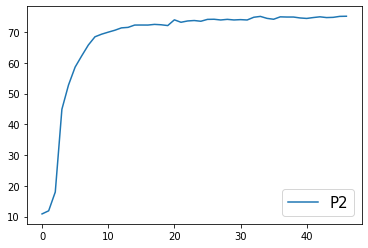

In [226]:
aol = "acc"
# aol = "loss"
file_path = f"./saved_exp_info/server_{aol}/"

# 旧
# fedavg = np.array(pickle.load(open(file_path + "P0_CIFAR10_nbal_0.001_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.0_exp4.pkl", 'rb')), dtype=object)  # 旧

# 旧
# fedprox = np.array(pickle.load(open(file_path + "P0_exp2_CIFAR10_nbal_0.01_CIFAR10_CNN_lr0.1_d1.0_iter600_lamda0.5.pkl", 'rb')), dtype=object) # 旧

# p0 = np.array(pickle.load(open(file_path + globe, 'rb')), dtype=object)
# p1 = np.array(pickle.load(open(file_path + "P1_CIFAR10_nbal_0.001_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.0_exp5.pkl", 'rb')), dtype=object)
# p2 = np.array(pickle.load(open(file_path + "P2_mu0.0_ld0.0_ln0.1_dN0.999_CIFAR10_nbal_0.001_CIFAR10_CNN_lr0.1_d1.0_iter800_expN1.pkl", 'rb')), dtype=object)

# p_1 = np.array(pickle.load(open(file_path + "P-1_CIFAR10_nbal_0.001_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.5_exp3.pkl", 'rb')), dtype=object)


p21 = np.array(pickle.load(open(file_path + "P2_mu0.0_ld0.0_ln0.2_dN0.998_FMNIST_nbal_0.01_MNIST_Net_lr0.2_d1.0_iter600_expS2-2.pkl", 'rb')), dtype=object)  # 旧
p22 = np.array(pickle.load(open(file_path + "P2_mu0.0_ld0.0_ln0.2_dN0.998_FMNIST_nbal_0.001_MNIST_Net_lr0.2_d1.0_iter600_expS2.pkl", 'rb')), dtype=object)  # 旧
print(f"{len(p21)}", p21[-1]) # N3 92 / 30s  500+600 /2 /60
print(f"{len(p22)}", p22[-1]) # e1 130 / 30s

# plt.plot(fedavg,label="FedAvg")
# plt.plot(fedprox,label="FedProx")
# plt.plot(p1,label="P1")
plt.plot(p21,label="P2")
# plt.plot(p_1,label="P_1")

font1 = {
    'weight' : 'normal',
    'size'   : 15,
}
plt.legend(loc = "lower right", prop=font1) # 设置信息框

plt.show()

/home/xserver/anaconda3/envs/PFL/lib/python3.6/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


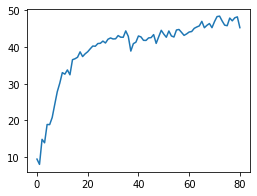

0: 45.27835051546392 - P-1_CIFAR10_nbal_0.001_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.5_exp3.pkl - 81


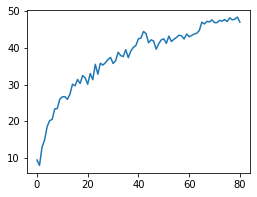

1: 47.01030927835051 - P-1_CIFAR10_nbal_0.001_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.6_exp3.pkl - 81


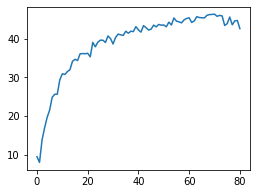

2: 42.63917525773195 - P-1_CIFAR10_nbal_0.001_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.7_exp3.pkl - 81


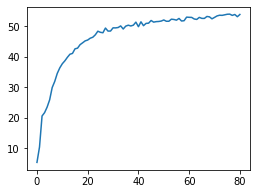

3: 53.8041237113402 - P-1_CIFAR10_nbal_0.01_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.5_exp3.pkl - 81


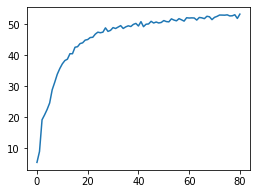

4: 53.2680412371134 - P-1_CIFAR10_nbal_0.01_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.6_exp3.pkl - 81


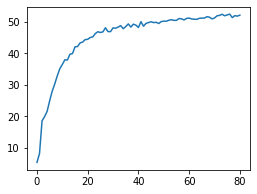

5: 52.16494845360825 - P-1_CIFAR10_nbal_0.01_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.7_exp3.pkl - 81


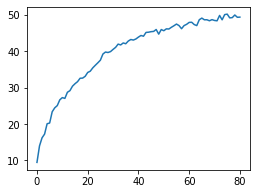

6: 49.412371134020624 - P0_CIFAR10_nbal_0.001_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.0_exp4.pkl - 81


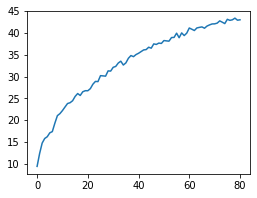

7: 43.0 - P0_CIFAR10_nbal_0.001_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.5_exp4.pkl - 81


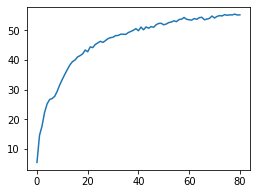

8: 55.22680412371133 - P0_CIFAR10_nbal_0.01_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.0_exp2.pkl - 81


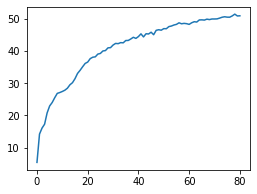

9: 50.855670103092784 - P0_CIFAR10_nbal_0.01_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.5_exp2.pkl - 81


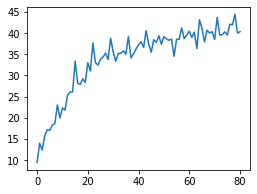

10: 40.3298969072165 - P1_CIFAR10_nbal_0.001_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.0_exp5.pkl - 81


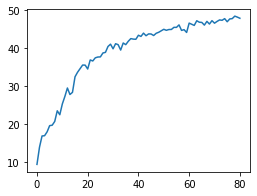

11: 47.91752577319588 - P1_CIFAR10_nbal_0.001_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda2.0_exp7.pkl - 81


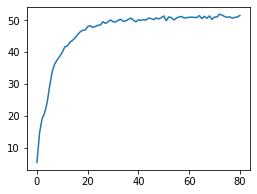

12: 51.48453608247423 - P1_CIFAR10_nbal_0.01_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.0_exp5.pkl - 81


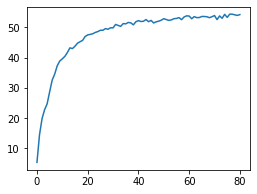

13: 54.2061855670103 - P1_CIFAR10_nbal_0.01_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda2.0_exp7.pkl - 81


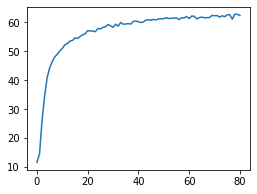

14: 62.30927835051546 - P1_CIFAR10_nbal_0.1_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.0_exp5.pkl - 81


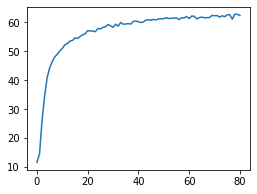

15: 62.30927835051546 - P1_CIFAR10_nbal_0.1_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda2.0_exp7.pkl - 81


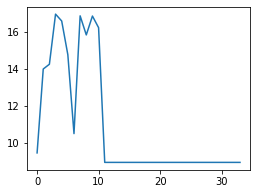

16: 8.938144329896907 - P2_CIFAR10_nbal_0.001_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.6_exp6.pkl - 34


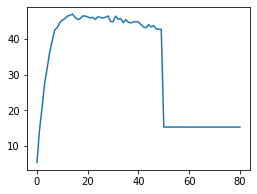

17: 15.298969072164947 - P2_CIFAR10_nbal_0.01_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.2_exp2.pkl - 81


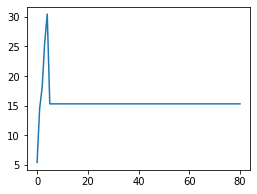

18: 15.298969072164947 - P2_CIFAR10_nbal_0.01_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.4_exp2.pkl - 81


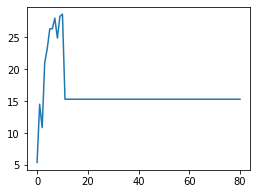

19: 15.298969072164947 - P2_CIFAR10_nbal_0.01_CIFAR10_CNN_lr0.1_d1.0_iter800_lamda0.6_exp2.pkl - 81


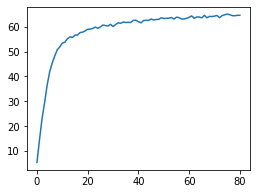

20: 64.56701030927834 - P2_mu0.0_ld0.0_ln0.1_dN0.999_CIFAR10_nbal_0.01_CIFAR10_CNN_lr0.1_d1.0_iter800_expN2.pkl - 81


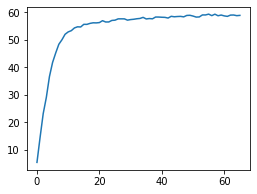

21: 58.845360824742265 - P2_mu0.0_ld0.0_ln0.1_dN0.99_CIFAR10_nbal_0.01_CIFAR10_CNN_lr0.1_d1.0_iter800_expN2.pkl - 66


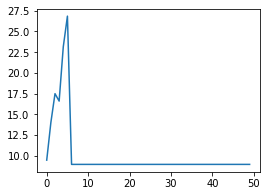

22: 8.938144329896907 - P2_mu0.0_ld0.0_ln0.2_dN0.999_CIFAR10_nbal_0.001_CIFAR10_CNN_lr0.1_d1.0_iter800_expN1.pkl - 50


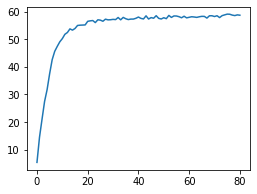

23: 58.70103092783504 - P2_mu0.0_ld0.0_ln0.2_dN0.99_CIFAR10_nbal_0.01_CIFAR10_CNN_lr0.1_d1.0_iter800_expN2.pkl - 81


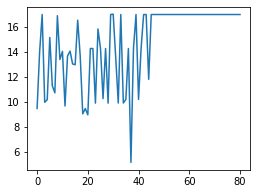

24: 16.969072164948454 - P2_mu0.0_ld0.0_ln0.3_dN0.999_CIFAR10_nbal_0.001_CIFAR10_CNN_lr0.1_d1.0_iter800_expN1.pkl - 81


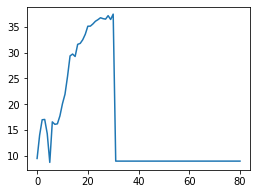

25: 8.938144329896907 - P2_mu0.0_ld0.0_ln0.3_dN0.99_CIFAR10_nbal_0.001_CIFAR10_CNN_lr0.1_d1.0_iter800_expN1.pkl - 81


In [149]:
aol = "acc"
# aol = "loss"
file_path = f"./saved_exp_info/server_{aol}/"

g = []

for root, dirs, files in os.walk(file_path):
    # 遍历文件
    for file in files:
        g.append(file)

g = np.sort(np.array(g))
infs = []
infx = []

for index in range(len(g)):
    
    globe = g[index]
    
    inf_g = np.array(pickle.load(open(file_path + globe, 'rb')), dtype=object)
    if len(inf_g)<=81:
        infs += [inf_g.tolist()]
        infx.append(g[index])
        
infs = np.array(infs)
infx = np.array(infx)
idxs = range(len(infs))

for index in idxs:
    plt.figure(figsize=(4, 3)) # 设置整个图像的尺寸（长高分别为6、5个单位）
    plt.plot(infs[index]) 
    plt.show()
    print(f"{index}: {infs[index][-1]} - {g[index]} - {len(infs[index])}")

In [ ]:
aol = "acc"
aol = "loss"
file_path = f"./saved_exp_info/server_{aol}/"
for name in ddname:
    print(1)
    print(name)
#     npath = file_path + name
#     if os.path.exists(npath):
#         os.remove(npath)
#     else:
#         print(0)

In [44]:
arr = np.array([1,3,5])
 
print(arr.shape)
# print(f'arr\n{arr}')
 
# # 按第2列排序（column index = 1）
# sidx = arr[:,1].argsort()
# print('按第2列排序\n',arr[sidx])

(3,)
